In [1]:
import os
import glob
from PIL import Image, ImageChops
import numpy as np

Init done.


In [59]:
IMG_DIR = r""
files = os.listdir(IMG_DIR)
files = sorted([files[f] for f in range(0,len(files),10)])
dic = {}
for file in files:
    a = file.split("_")#[9]
    dic[a[9]+"06"+a[3].zfill(2)+a[4].zfill(2)+a[6].zfill(2)+a[8].zfill(2)] = file

In [60]:
dir = r""
x = [os.path.basename(files).split("_")[9]+"06"+os.path.basename(files).split("_")[3].zfill(2)+os.path.basename(files).split("_")[4].zfill(2)+os.path.basename(files).split("_")[6].zfill(2)+os.path.basename(files).split("_")[8].zfill(2) for folda in glob.glob(dir+"\*") for files in glob.glob(dir+"\\"+os.path.basename(folda)+"\*")]
y = [folda[-2:] for folda in glob.glob(dir+"\*") for files in glob.glob(dir+"\\"+os.path.basename(folda)+"\*")]

In [82]:
dir = r""
delete_dir = r""

files_path = [files for folda in glob.glob(dir+"\*") for folda2 in glob.glob(dir+"\\"+os.path.basename(folda)+"\*") for files in glob.glob(dir+"\\"+os.path.basename(folda)+os.path.basename(folda2)+"\*")]
del_filename = [os.path.basename(files) for files in glob.glob(delete_dir+"\*")]
for file_path in files_path:
    if os.path.basename(file_path) in del_filename:
        os.remove(file_path)
        print(file_path)

In [61]:
yy = []
for filename in sorted(dic.keys()):
    try:
        yy.append(y[x.index(filename)])
    except:
        yy.append("なし")

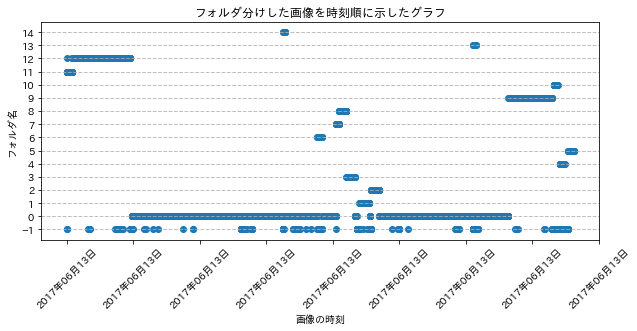

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 
from matplotlib.ticker import MaxNLocator

def plt_foldas(x_label,y_scatter):
    fig,axes=plt.subplots(1,1,figsize=(10, 4))
    axes.scatter(np.arange(len(y_scatter)), y_scatter)
    axes.grid(which = "major", axis = "y", alpha = 0.8, linestyle = "--", linewidth = 1)
    axes.set_title("フォルダ分けした画像を時刻順に示したグラフ")
    axes.set_xlabel("画像の時刻")
    axes.set_ylabel("フォルダ名")
    plt.xticks(x_scatter,x_label,rotation=45)
    #plt.yticks(y_scatter)
    axes.xaxis.set_major_locator(MaxNLocator(10))
    axes.yaxis.set_major_locator(MaxNLocator(len(set(y_scatter))+1))
    plt.show()

xx= [file[:4]+"年"+file[4:6]+"月"+file[6:8]+"日" for file in sorted(dic.keys())]
plt_foldas(xx,[int(y) for y in yy])